# Quality assessment: Gravimetric mass balance data for the Antarctic and Greenland ice sheets from 2003 to 2020 derived from satellite observations

### Use Case: Monitoring Greenland and Antarctic ice mass changes in the 21st century for usage in the context of Earth System modeling

### User Question:  Are the Greenland and Antarctic ice mass change data sufficiently accurate to be used in glaciological, climatological, and/or hydrological modeling efforts, such as the calibration or validation of an ice sheet model?

This script summarizes the scientific quality assessment provided for the C3S_520 service regarding Gravimetric Mass Balance (GMB) data for the Greenland (GrIS) and Antarctic Ice Sheet (AIS) as they are available on the Climate Data Store (CDS).

## General description

The mass balance of an ice sheet is the difference between mass gained (from snow accumulation) and mass lost (by melting/runoff or ice discharge into the ocean), which is the same as the net mass change of the ice sheet. Remote sensing techniques, such as the use of satellites, are an important feature to derive and study the mass changes of the ice sheets. Remote sensing devices, such as used by the GRACE and GRACE-FO (Gravity Recovery and Climate Experiment / Follow-On) missions, are able to inspect directly and repeatedly large areas of ice. More particularly, the GRACE(-FO) mission is able to detect changes within the Earth’s gravitational field, and further processing of these data transforms this raw information into mass balance and grounded mass change data. Remote sensing techniques that use satellite data are therefore considered the only feasible manner to derive accurate mass change data of the remote ice sheets on a regular basis. These techniques, however, also have their limitations of which the user should take note before using the product. 

One of the drawbacks of gravimetry-derived mass changes is the coarse spatial resolution at which data are acquired (i.e. the time series at the CDS is derived from data with a spatial resolution of 50x50 km). Although this number is at its minimum GCOS requirement (World Meteorological Organization, 2022), the large spatial extent of data acquisition makes mass change estimates sensitive to leakage errors. Another large source of uncertainty arises due to the fact that mass redistributions in the Earth’s interior because of glacial isostatic adjustment (i.e. as a response to past and present ice sheet mass changes) likewise impact the gravity solution. A last limitation of the CDS data is the fact that no gridded data are provided, which makes the user unable to investigate gridded patterns of mass changes. Caution is furthermore warranted for proper interpretation of (gravimetric) mass balance data. Mass change data measured by GRACE(-FO) comprises the total mass balance of grounded ice or land ice, i.e. the surface mass balance (accumulation minus runoff) and basal mass balance, together with solid ice discharge (i.e. the ice flux through the grounding line). Once ice crosses the grounding line, it becomes afloat and its mass changes (i.e. ice calving at the ice shelf front or basal melting of floating ice due to warm ocean water beneath) are no longer detected by GRACE(-FO).

Mapping the ice sheet mass changes and its temporal variability provides key information for investigating the  response of glaciers and ice sheets to changing boundary conditions such as climate change (e.g. Forsberg et al., 2017; Groh et al., 2019). High-quality products are therefore desired to accurately assess and understand the current general state, as well as the temporal evolution (i.e. climate change impact) of the ice sheets. Moreover, data maturity and high quality GMB data are evidently important when serving as input into an ice sheet modelling framework, for example to derive global sea level change contributions (e.g. Forsberg et al., 2017; WCRP Global Sea Level Budget Group, 2018; Sasgen et al., 2019; Groh et al., 2019; Fox-Kemper et al., 2021). 

## Setup and retrieval

#### Let's first load the required packages

Here, we will load all packages that are needed to run the code.

In [1]:
import netCDF4 as nc
import cdsapi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
import zipfile
import pyproj
import math
import warnings
from datetime import datetime
from dateutil import relativedelta
from astropy.time import Time
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

#### Set the data request

We set up the data request to download the data from the CDS.

In [ ]:
c = cdsapi.Client()

c.retrieve(
    'satellite-ice-sheet-mass-balance',
    {
        'variable': 'all',
        'format': 'zip',
    },
    'download.zip')

#### Unpack the downloaded data

Now that the data are downloaded, we can extract them out of the NetCDF file.

In [ ]:
files = glob.glob('/Users/yoniverhaegen/download.zip')
files
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('/Users/yoniverhaegen/')

In [2]:
# Dataset
dataset = nc.Dataset('/Users/yoniverhaegen/C3S_GMB_GRACE_vers3.nc')

#### Extract the mass balance data

Now we can extract the time series of mass balance values. These data have units in Gt and cover the land ice of the entire ice sheets.

In [3]:
# GrIS
gmb_gris = dataset['GrIS_total'][:]
gmb_gris.data;
# AIS
gmb_ais = dataset['AntIS_total'][:]
gmb_ais.data;

#### Extract the mass balance uncertainty data

We can also extract the uncertainty values.

In [4]:
# GrIS
gmb_gris_err = dataset['GrIS_total_er'][:]
gmb_gris_err.data;
# AIS
gmb_ais_err = dataset['AntIS_total_er'][:]
gmb_ais_err.data;

#### Extract the time variable

Here, we extract the time variable and convert it to decimal years for easy plotting of the time variable on the x-axis

In [5]:
# Extract time variable
time_gmb = dataset['time'][:]
time_gmb.data;
t_unit = dataset.variables['time'].units
n = len(time_gmb)
# Convert this to decimal years
time_convert = nc.num2date(time_gmb, t_unit)
date_year = np.zeros(n)
for i in range(0,n):
        time_convert_time=time_convert[i]
        d1_time = int(time_convert_time.strftime('%Y'))
        date_year[i]=d1_time
date_month = np.zeros(n)
for i in range(0,n):
        time_convert_time=time_convert[i]
        d1_time = int(time_convert_time.strftime('%m'))
        date_month[i]=d1_time
date_day = np.zeros(n)
for i in range(0,n):
        time_convert_time=time_convert[i]
        d1_time = int(time_convert_time.strftime('%d'))
        date_day[i]=d1_time
decimal_year = np.zeros(n)
for i in range(0,n):
        input_date =  datetime(int(date_year[i]), int(date_month[i]), int(date_day[i]))
        astropy_time_object = Time(input_date,format='datetime')
        decimal_year[i] = astropy_time_object.decimalyear

## Results and discussion

#### We can now finally plot the gravimetric mass balance data with its uncertainty 

At last, the mass balance data with their uncertainty at the ice sheet-wide scale are ready to be plotted. From this, we can also determine the uncertainty of the overall average mass change rate of the ice sheets. To do so, no additional processing of the data has been performed.

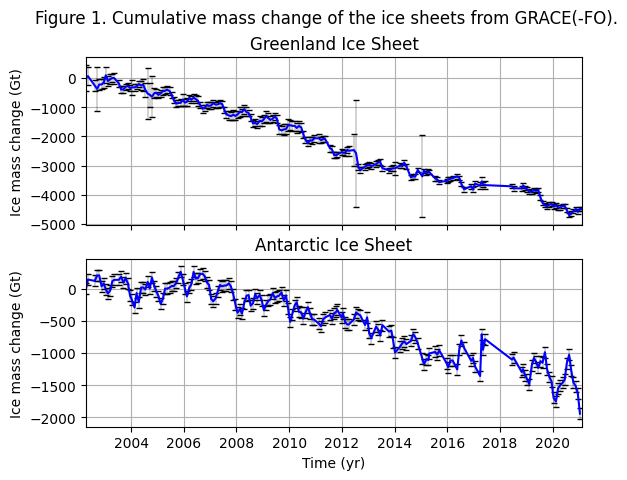

In [7]:
fig=plt.figure()
# GrIS
plt.subplot(2,1,1)
plt.errorbar(decimal_year, gmb_gris.data-gmb_gris.data[0],gmb_gris_err.data, color = 'blue', ecolor='black', capsize=2, elinewidth=0.25)
plt.ylabel("Ice mass change (Gt)")
plt.title("Greenland Ice Sheet")
plt.xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.xticks(color='w')
plt.xlim(decimal_year[0], decimal_year[-1])
plt.grid()
# AIS
plt.subplot(2,1,2)
plt.errorbar(decimal_year, gmb_ais.data-gmb_ais.data[0],gmb_ais_err.data, color = 'blue', ecolor='black', capsize=2, elinewidth=0.25)
plt.ylabel("Ice mass change (Gt)")
plt.xlabel("Time (yr)")
plt.title("Antarctic Ice Sheet")
plt.xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.xlim(decimal_year[0], decimal_year[-1])
plt.grid()
fig.suptitle('Figure 1. Cumulative mass change of the ice sheets from GRACE(-FO).');
plt.show()

We can also plot the error estimates seperately:

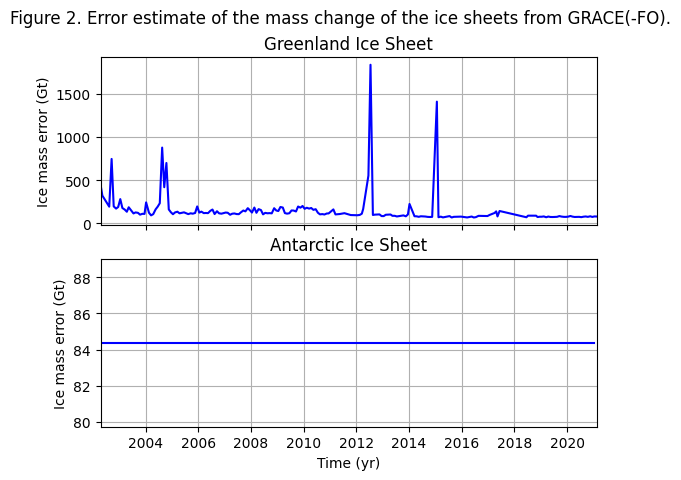

In [9]:
fig=plt.figure()
# GrIS
plt.subplot(2,1,1)
plt.plot(decimal_year, gmb_gris_err.data,color='blue')
plt.ylabel("Ice mass error (Gt)")
plt.title("Greenland Ice Sheet")
plt.xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.xticks(color='w')
plt.xlim(decimal_year[0], decimal_year[-1])
plt.grid()
# AIS
plt.subplot(2,1,2)
plt.plot(decimal_year, gmb_ais_err.data,color='blue')
plt.ylabel("Ice mass error (Gt)")
plt.xlabel("Time (yr)")
plt.title("Antarctic Ice Sheet")
plt.xticks([2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022])
plt.xlim(decimal_year[0], decimal_year[-1])
plt.grid()
fig.suptitle('Figure 2. Error estimate of the mass change of the ice sheets from GRACE(-FO).');
plt.show()

Accuracy/precision is represented by an average monthly error estimate in the time series files. The error term mainly sources from the sum of errors in the monthly gravity field solutions, leakage errors due to the limited spatial resolution achieved by the GRACE(-FO) missions, and errors in models used to reduce superimposed mass signals. Error values show a high temporal variability for the GrIS. There are, however, peaks with error values up to more than 1000 Gt. For Antarctica, this value is constant in time. 

The mass changes and their errors derived from GRACE(-FO) are expressed in Gt (Gigatonnes). Since the Gt is a unit of mass, one Gt of ice weighs exactly the same as a Gt of water. It can be translated into a volume, for example one Gt of water (density 1000 kg/m^3) is exactly one km^3, while one Gt of ice (density 917 kg/m^3) in volume becomes 1.091 km^3 of ice.

The average values can be easily calculated:

In [12]:
mean_err_gris = np.nanmean(gmb_gris_err.data)
print(f'The average mass change error of the GrIS during the observed period is {mean_err_gris:.2f} Gt/month.')
mean_err_ais = np.nanmean(gmb_ais_err.data)
print(f'The average mass change error of the AIS during the observed period is {mean_err_ais:.2f} Gt/month.')

The average mass change error of the GrIS during the observed period is 149.05 Gt/month.
The average mass change error of the AIS during the observed period is 84.38 Gt/month.


The error values are large and therefore do not meet the minimum requirement proposed by the GCOS (Global Climate Observing System), which is set to a threshold of 10 km^3 yr^-1 (World Meteorological Organization, 2022).

#### We can also calculate the error on the cumulative sum of all the monthly mass changes.

This can be done using the propagation of errors.

In [15]:
# For the GrIS
sum_of_sq = np.nansum(gmb_gris_err.data**2)
total_err = np.sqrt(sum_of_sq)
print(f'The cumulative mass change of the GrIS during the observed period is {gmb_gris.data[-1]-gmb_gris.data[0]:.2f} +/- {total_err:.2f} Gt.')
# For the AIS
sum_of_sq = np.nansum(gmb_ais_err.data**2)
total_err = np.sqrt(sum_of_sq)
print(f'The cumulative mass change of the AIS during the observed period is {gmb_ais.data[-2]-gmb_ais.data[0]:.2f} +/- {total_err:.2f} Gt.')

The cumulative mass change of the GrIS during the observed period is -4483.13 +/- 3280.69 Gt.
The cumulative mass change of the AIS during the observed period is -1941.76 +/- 1172.29 Gt.


Again, it can be concluded that the cumulative error is relatively large when compared to the actual cumulative mass change itself.

# Conclusion

#### Key strengths and key weaknesses

<u>Key strengths</u>:

• The data can be easily displayed with open-source software and files are well structured.<br>
• The data have a long temporal extent and are found to be suitable to derive mean values, variability and trends (climate change signals).<br>
• The spatial resolution (time series is derived from data at 50 km), the temporal resolution
(monthly) and the timespan of data acquisition (all-year round) all satisfy the minimum GCOS requirements (World Meteorological Organization, 2022).<br>
• The time series includes data from all grounded ice across the whole ice sheet (i.e. includes peripheral glaciers and ice caps).<br>
• There is an abundant amount of guidance or help documents freely and publicly available. Contact information is also provided. <br>
• The data guidance documents are regularly updated, are publicly accessible and include
feedback. References to scientific peer-reviewed literature are also provided.<br>
• Data have been used in peer-reviewed research (e.g. Forsberg et al., 2017; WCRP Global Sea Level Budget Group, 2018; Sasgen et al., 2019; Groh et al., 2019).<br>

<u>Key weaknesses:</u>

• No gridded data are available for download, although they exist through other sources (e.g. the TU Dresden website).<br>
• Only grounded ice is considered in the dataset, mass changes of floating ice are not considered (while they are considered in, for example, the ice sheet surface elevation change dataset that is on the CDS).<br>
• Data gaps are present (e.g. during the transition period between GRACE and GRACE-FO in 2017-2019 CE). These are not filled up and not flagged, users need to identify them themselves. <br>
• For the GMB data, the help/guidance documents on the CDS are not as extensive as compared to the ice sheet ice velocity and surface elevation change datasets that are on the CDS. Rather, multiple references to other (scientific) documentation (e.g. from ESA-CCI) are provided. <br>
• The consistent inclusion of data generation and processing techniques (e.g. applied corrections) into the metadata would further improve the product’s quality. <br>
• Uncertainty is introduced due to leakage errors and corrections for e.g. glacial isostatic adjustment. Error values are large and are not at their minimum GCOS requirement of 10 km^3 yr^-1 (World Meteorological Organization, 2022). <br>
• Indistinguishable effects of other factors can influence the Earth’s gravity field and may be intertwined in the obtained GRACE(-FO) mass change data, such as changes in the crust and mantle and tectonic activity.<br>

#### Take home messages

Mass change detection by GRACE(-FO) is a useful tool to grasp the impact of climate change on the ice sheets but, however, it also has its limitations of which the user should take note before using the product. As such, by means of an uncertainty characterization, the error estimate should be consulted before proper usage of the GMB data. On the CDS, accuracy/precision is therefore represented by an average monthly error estimate in the time series files. 

A large problem with the data is that the error propagated throughout the time series is quite large  when compared to the actual cumulative mass change, and that no pixel-by-pixel mass change and error products are included for the ice sheets. In some cases for the GrIS, error estimates even exhibit values larger than 1000 Gt/month. The main reason for these high uncertainty values are leakage errors (due to the coarse spatial resolution of GRACE(-FO) data acquisition) and the performed corrections for e.g. glacial isostatic adjustment. The GMB product should therefore be handled with care, for example, when assessing the corresponding impact on global sea level changes.

## References

Forsberg R., Sørensen L., and Simonsen S. (2017). Greenland and Antarctica Ice Sheet Mass
Changes and Effects on Global Sea Level. In: Cazenave A., Champollion N., Paul F., Benveniste J.
(eds), Integrative Study of the Mean Sea Level and Its Components. Space Sciences Series of ISSI,
58, p. 91-106, Springer, Cham. https://doi.org/10.1007/978-3-319-56490-6_5.

Fox-Kemper, B., H.T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S.S. Drijfhout, T.L. Edwards, N.R. Golledge, M. Hemer, R.E. Kopp, G. Krinner, A. Mix, D. Notz, S. Nowicki, I.S. Nurhati, L. Ruiz, J.-B. Sallée, A.B.A. Slangen, and Y. Yu (2021). Ocean, Cryosphere and Sea Level Change. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 1211–1362, https://doi.org/110.1017/9781009157896.011.

Groh, A., Horwath, M., Horvath, A., Meister, R., Sørensen, L.S., Barletta, V.R., Forsberg, R.,
Wouters, B., Ditmar, P., Ran, J., Klees, R., Su, X., Shang, K., Guo, J., Shum, C.K., Schrama, E., and
Shepherd, A. (2019). Evaluating GRACE Mass Change Time Series for the Antarctic and Greenland
Ice Sheet, Geosciences, 9(10). https://doi.org/10.3390/geosciences9100415.

Sasgen, I., Konrad, H., Helm, V., and Grosfeld, K. (2019). High-Resolution Mass Trends of the
Antarctic Ice Sheet through a Spectral Combination of Satellite Gravimetry and Radar Altimetry
Observations. Remote Sensing, 11(2):144. https://doi.org/10.3390/rs11020144.

WCRP Global Sea Level Budget Group (2018). Global sea-level budget 1993–present, Earth
System Science Data, 10, p. 1551–1590. https://doi.org/10.5194/essd-10-1551-2018.

World Meteorological Organization (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland.